구급차 수 및 배치된 응급구조사 수(시도별)\
https://kosis.kr/statHtml/statHtml.do?orgId=411&tblId=DT_41104_421&conn_path=I2

In [1]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
ambulance = pd.read_csv('../../Data/public health/구급차 수 및 배치된 응급구조사 수(시도별).csv', encoding='euc-kr', index_col='시점')
ambulance

,지역별(1),구급차 (대),구급차 (대).1,구급차 (대).2,인력 (명),인력 (명).1,인력 (명).2,인력 (명).3
시점,,,,,,,,
시점,지역별(1),소계,특수,일반,소계,1급 응급구조사,2급 응급구조사,의사/간호사
2014,전체,7654,3363,4291,8296,4441,3855,-
2015,전체,7800,3417,4383,9044,5047,3997,-
2016,전체,7763,3600,4163,28022,5684,4218,18120
2017,전체,7764,3502,4262,24077,6177,4364,13536
...,...,...,...,...,...,...,...,...
2017,제주,78,48,30,338,141,66,131
2018,제주,80,49,31,289,167,18,104
2019,제주,85,52,33,304,172,34,98


In [3]:
ambulance.iloc[0:1,:]

,지역별(1),구급차 (대),구급차 (대).1,구급차 (대).2,인력 (명),인력 (명).1,인력 (명).2,인력 (명).3
시점,,,,,,,,
시점,지역별(1),소계,특수,일반,소계,1급 응급구조사,2급 응급구조사,의사/간호사


In [4]:
# 컬럼 재정리, 불필요한 row 삭제
colnames = ['시도별','구급차 소계','특수구급차','일반구급차','의료인 계','1급 응급구조사','2급 응급구조사','의사/간호사']
ambulance.columns = colnames
ambulance = ambulance.iloc[1:,:]
ambulance[['시도별','구급차 소계','특수구급차','일반구급차','1급 응급구조사','2급 응급구조사','의사/간호사']]
ambulance.head()

,시도별,구급차 소계,특수구급차,일반구급차,의료인 계,1급 응급구조사,2급 응급구조사,의사/간호사
시점,,,,,,,,
2014,전체,7654,3363,4291,8296,4441,3855,-
2015,전체,7800,3417,4383,9044,5047,3997,-
2016,전체,7763,3600,4163,28022,5684,4218,18120
2017,전체,7764,3502,4262,24077,6177,4364,13536
2018,전체,7800,3578,4222,20878,6484,4015,10379


In [5]:
# index type in로 변환 
ambulance.index = ambulance.index.astype(int)
ambulance.index

Int64Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2014, 2015,
            ...
            2020, 2021, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='시점', length=144)

In [6]:
ambulance.shape

(144, 8)

In [7]:
# '-' 를 0으로 변환, values int로 변환
columns = ambulance.columns
columns[0]

for i in range(8):
    ambulance[ambulance.columns[i]][ambulance[ambulance.columns[i]] == '-'] = 0


for i in range(7): 
    ambulance.iloc[:,i+1]=ambulance.iloc[:,i+1].astype(int)

ambulance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 2014 to 2021
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시도별       144 non-null    object
 1   구급차 소계    144 non-null    int64 
 2   특수구급차     144 non-null    int64 
 3   일반구급차     144 non-null    int64 
 4   의료인 계     144 non-null    int64 
 5   1급 응급구조사  144 non-null    int64 
 6   2급 응급구조사  144 non-null    int64 
 7   의사/간호사    144 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 10.1+ KB


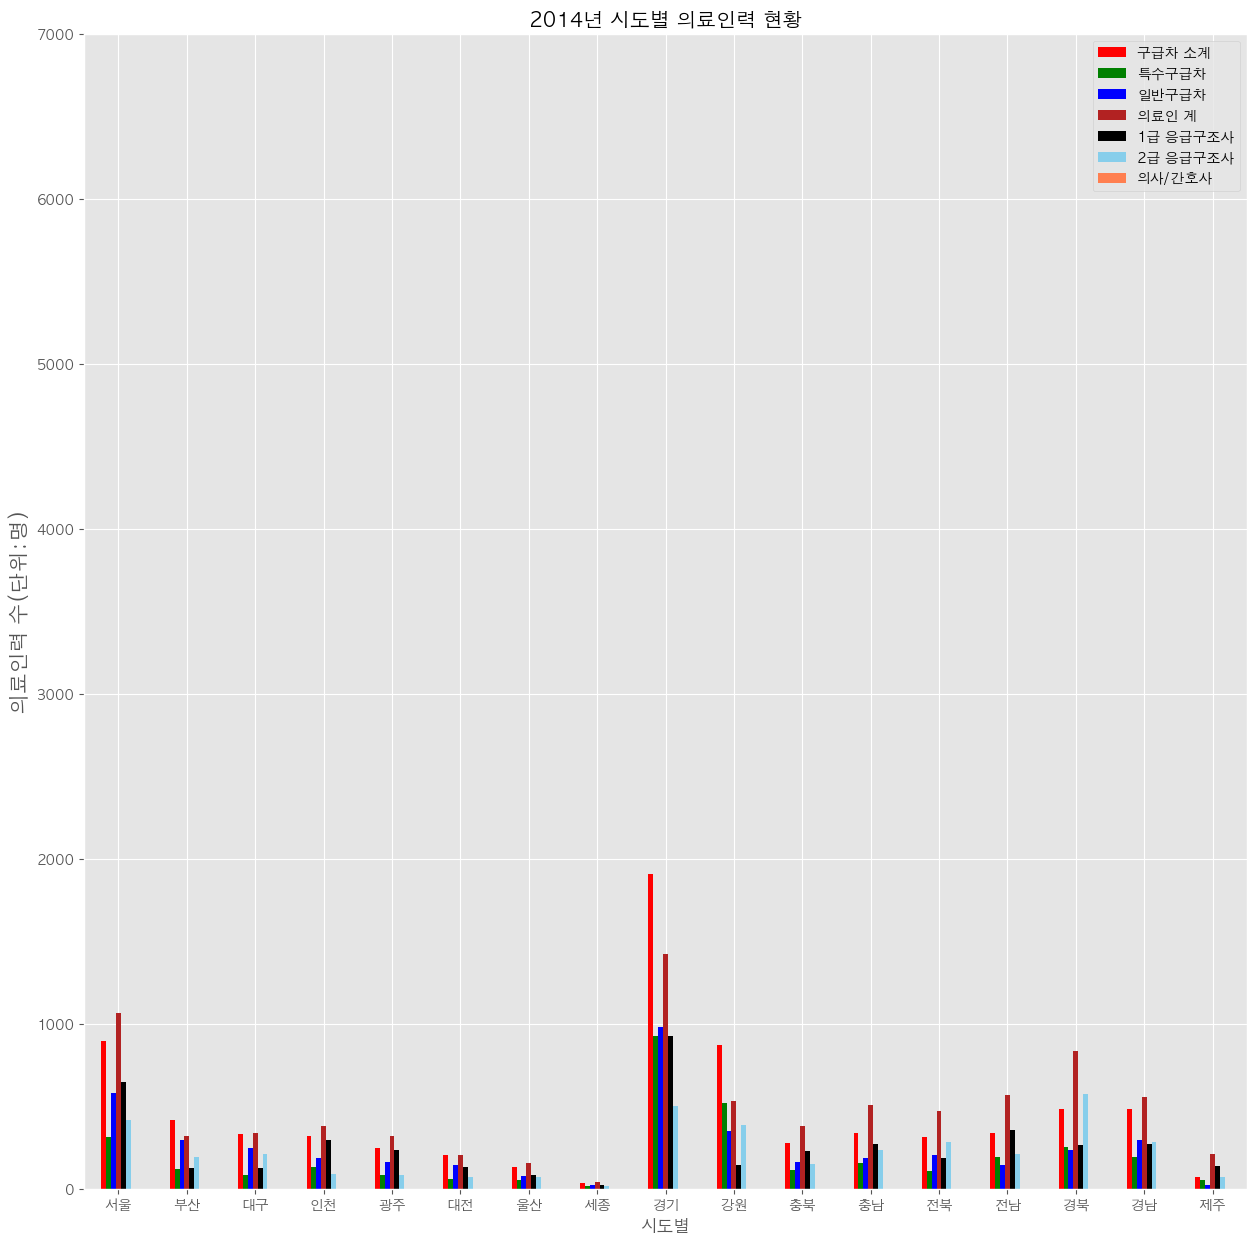

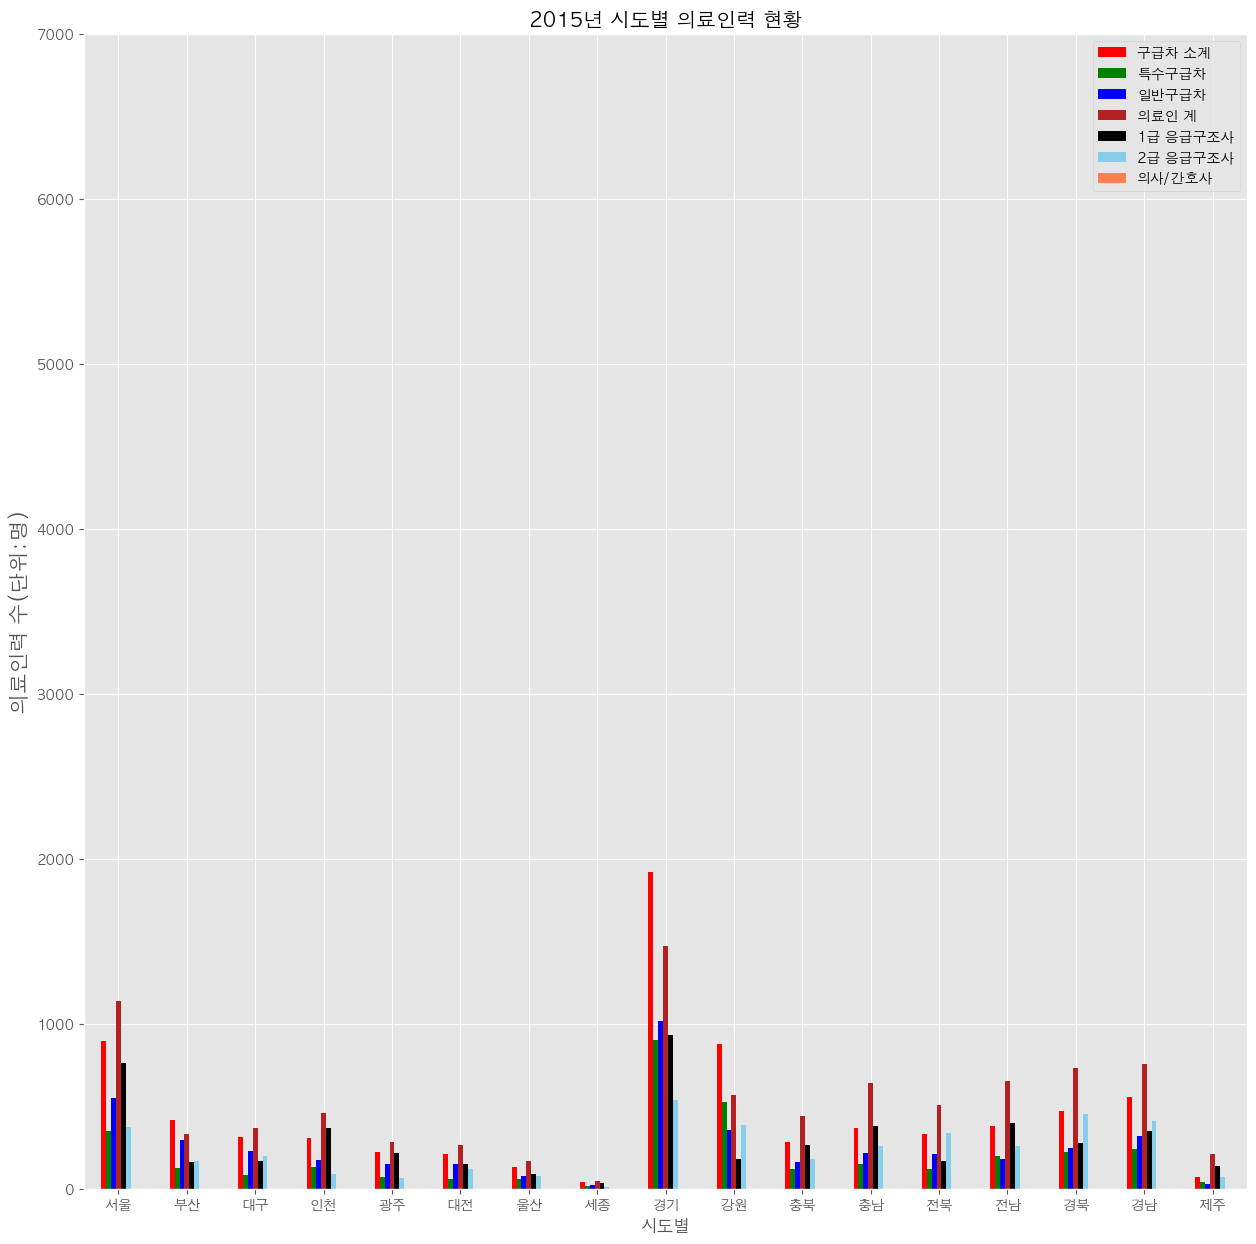

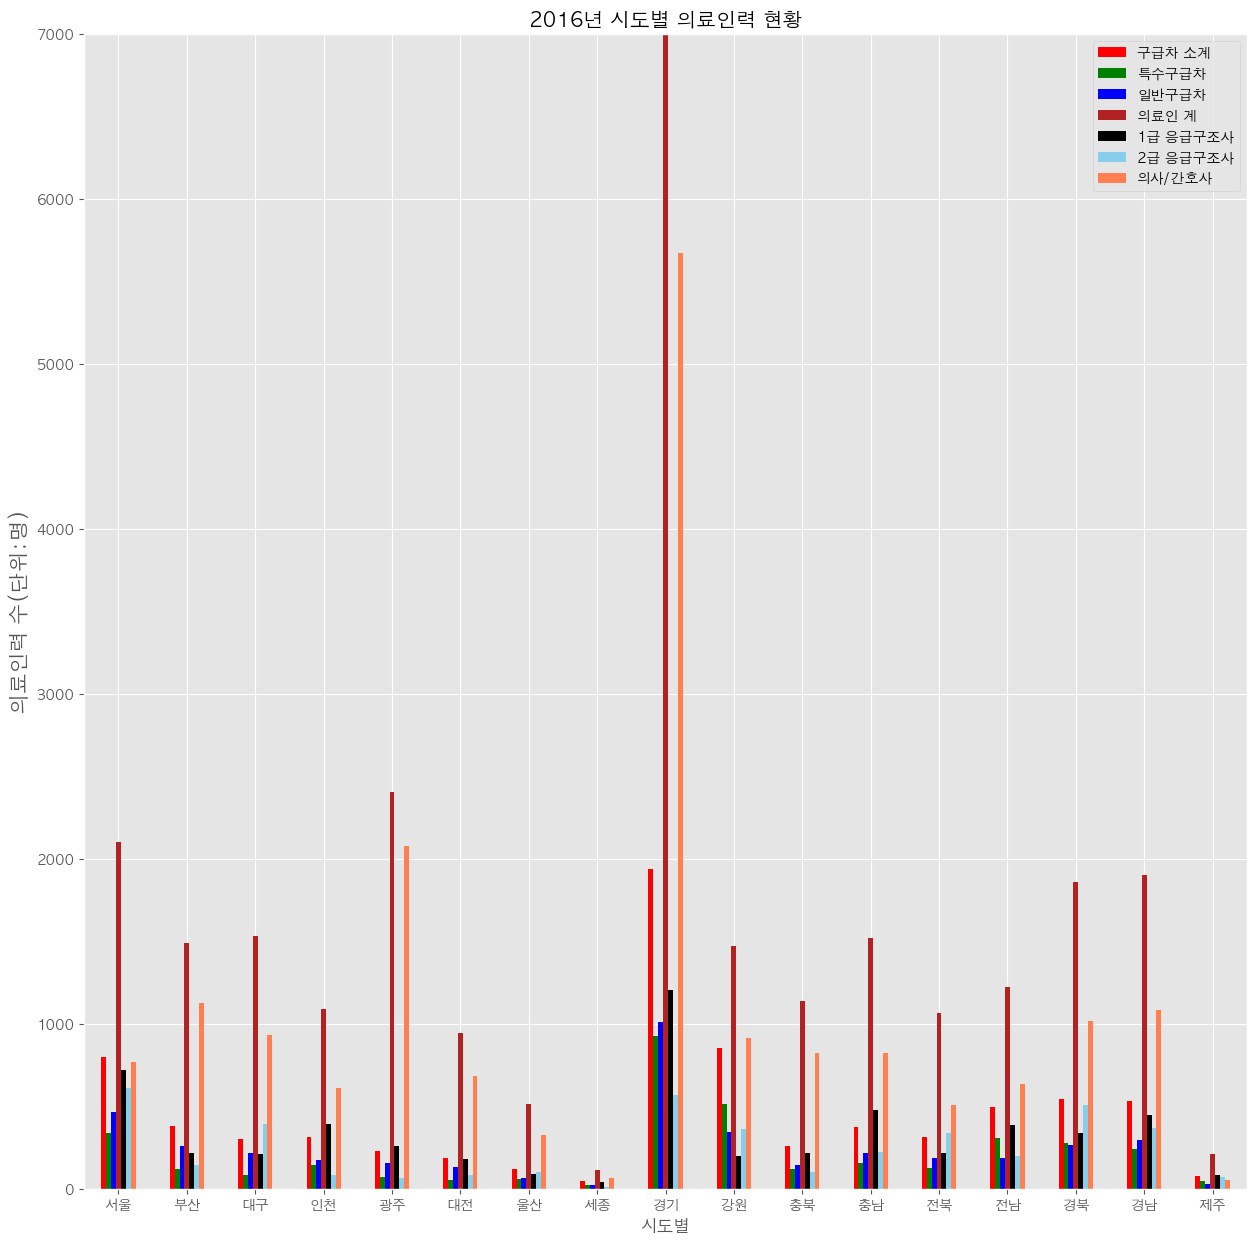

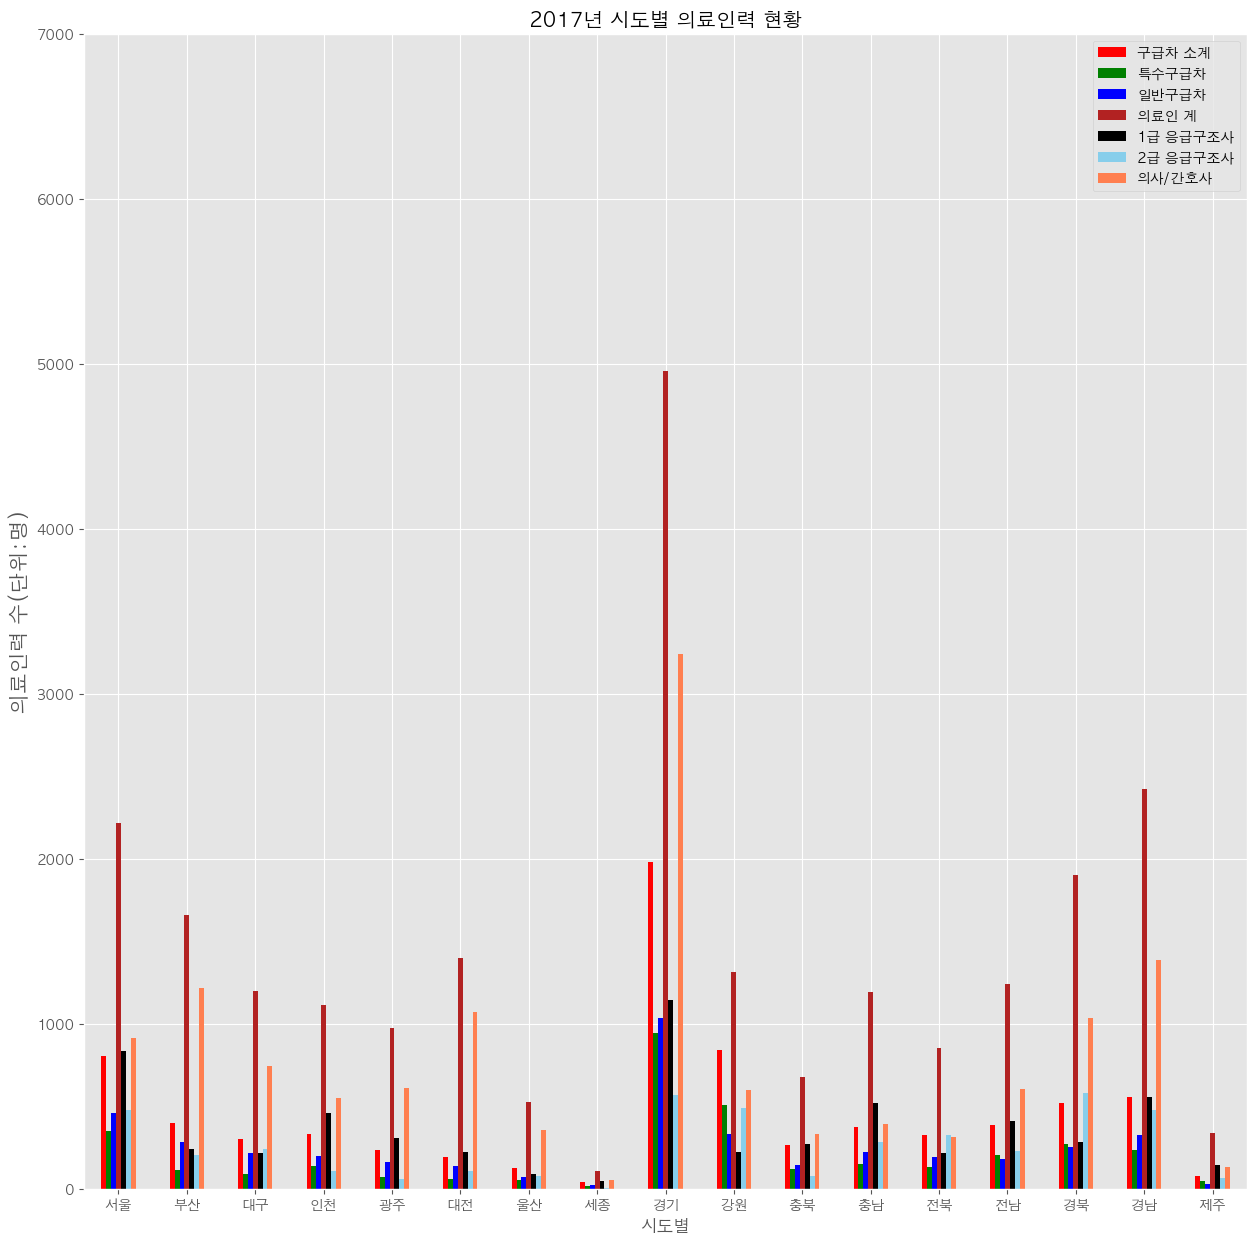

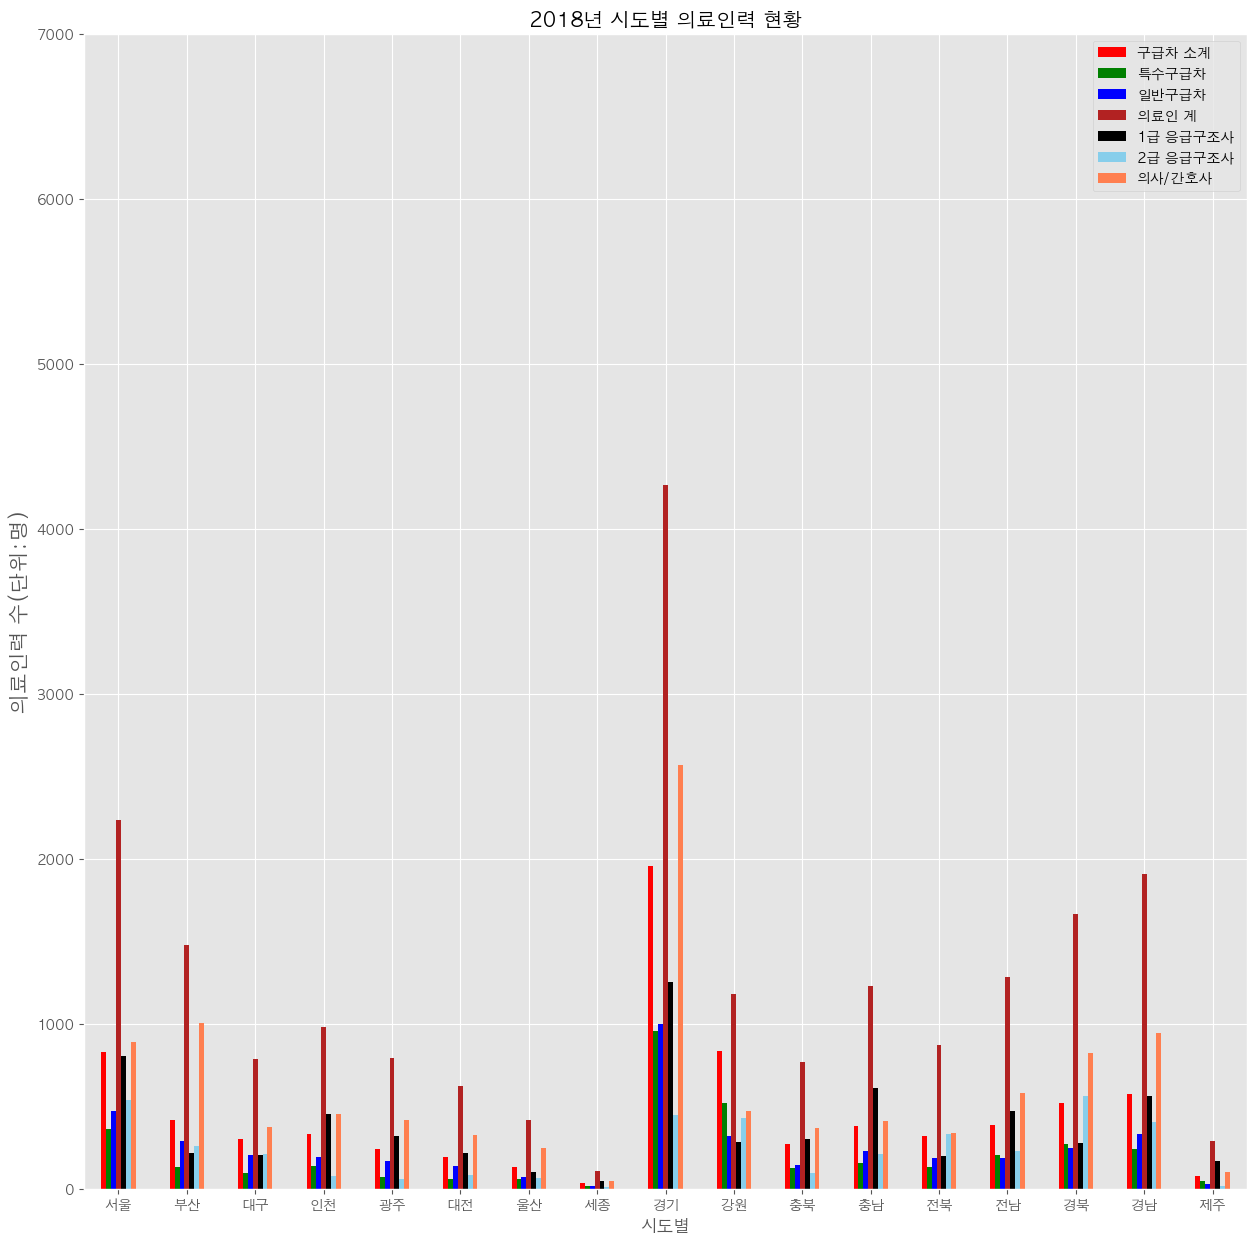

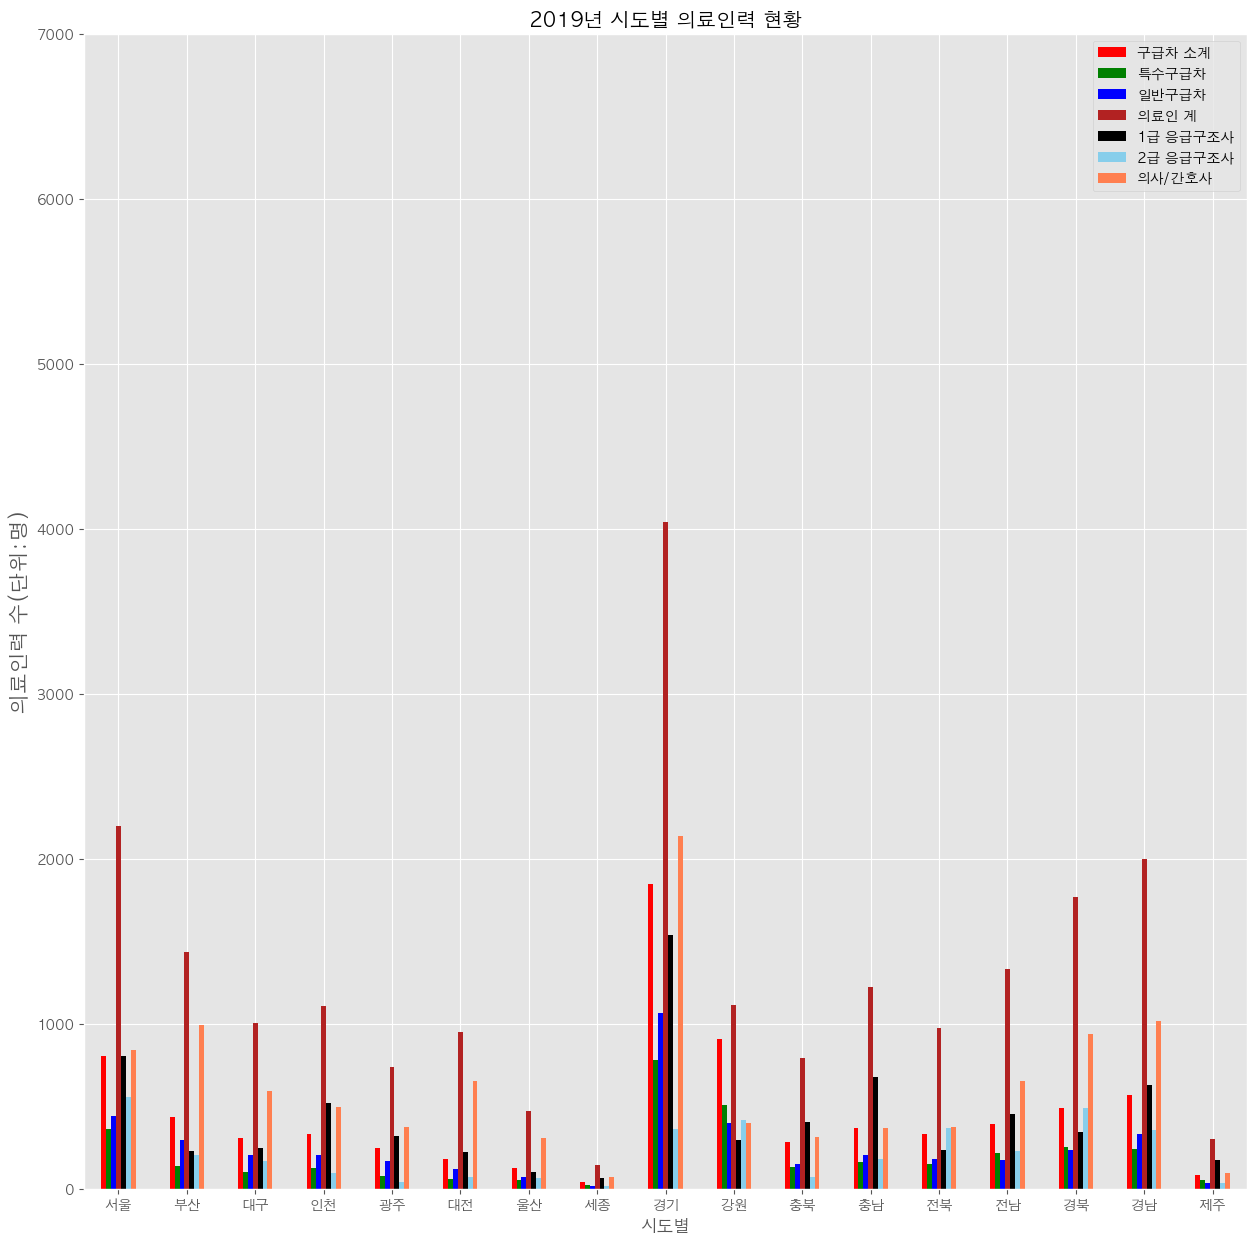

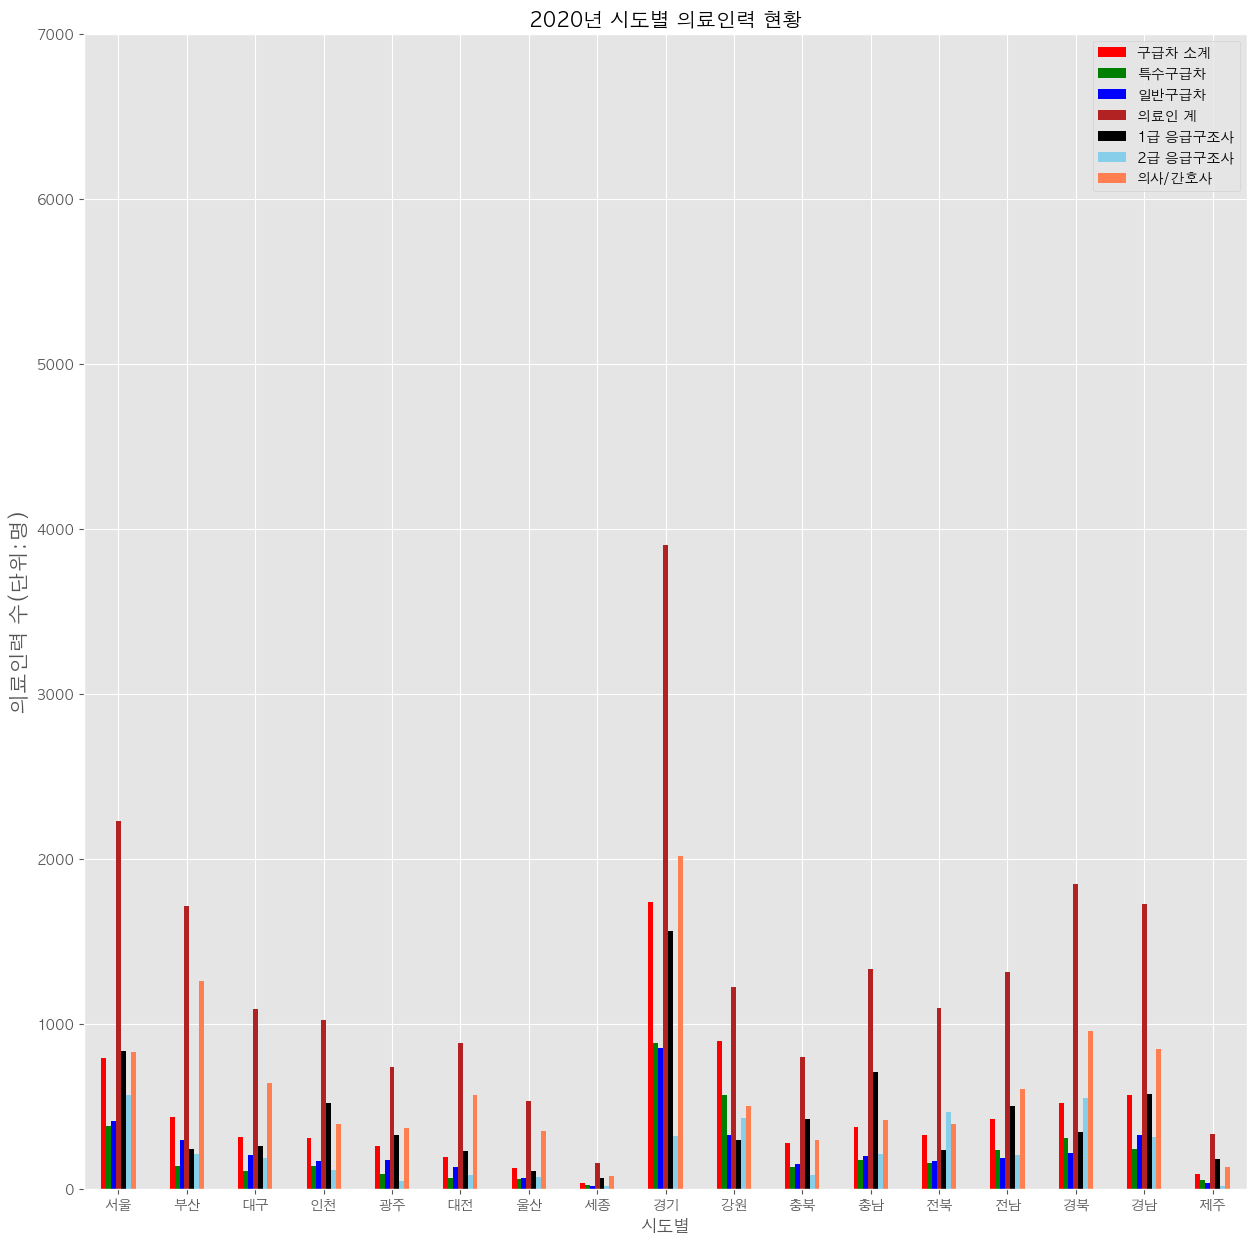

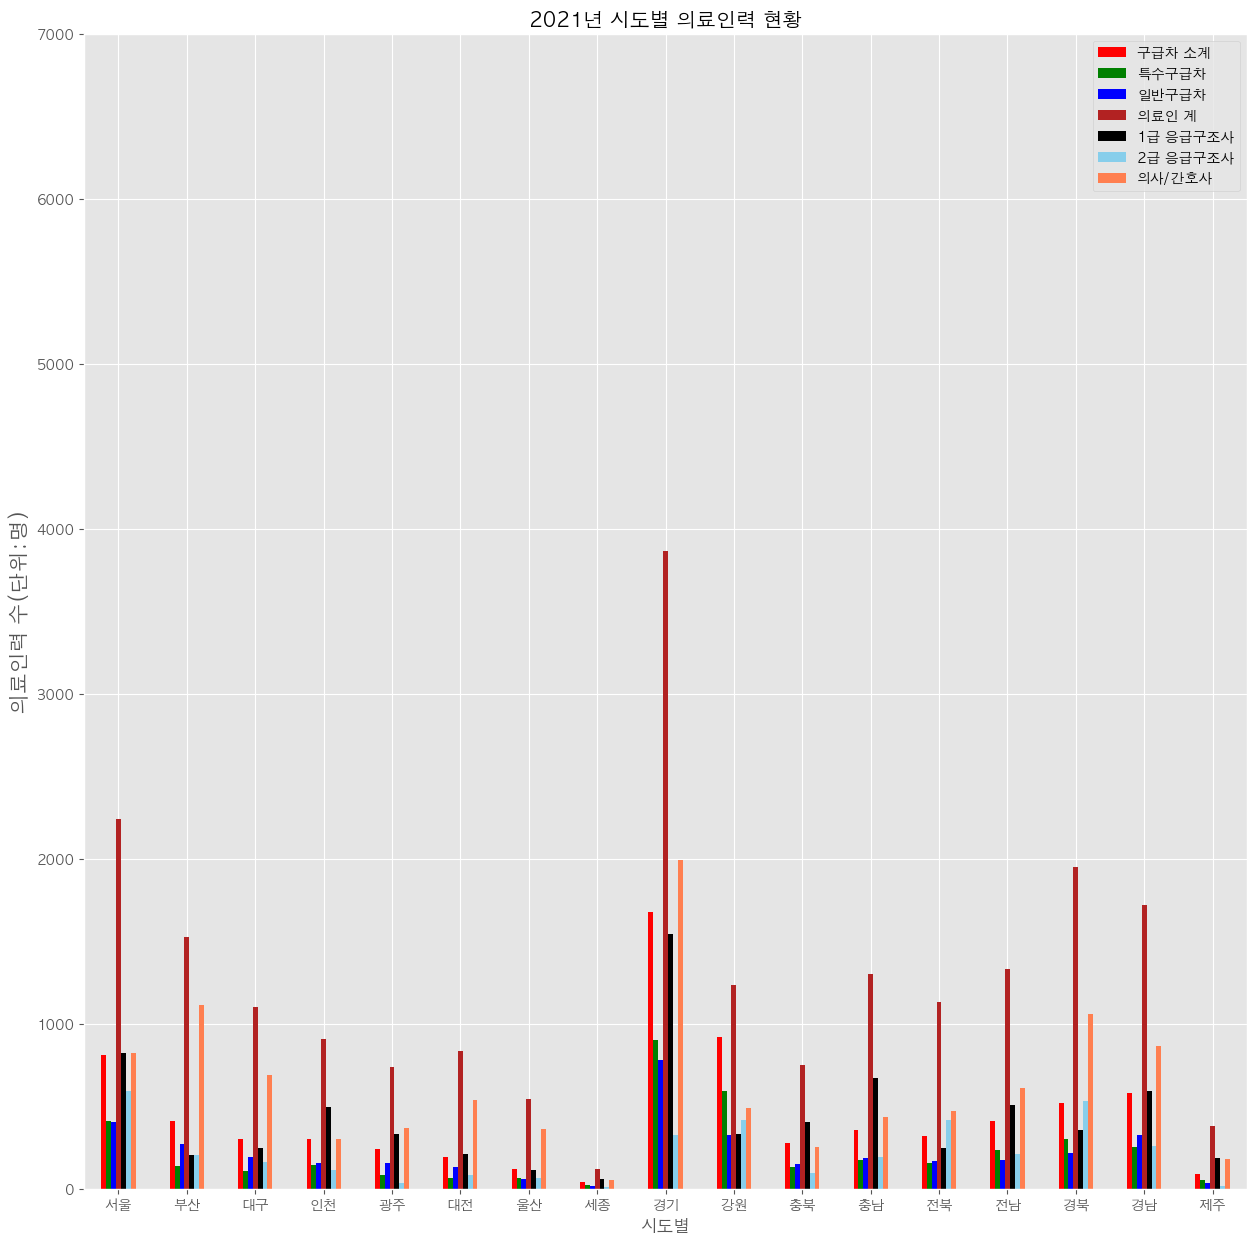

In [8]:
colors = ['red','green','blue','firebrick','black','skyblue','coral','darkviolet','mediumspringgreen','navy','yellow','pink','darkgreen','palevioletred']
# years = [y for y in range(2020,2022)]
years = [y for y in range(2014,2022)]
for year in years:
    titleYear = year
    year = ambulance[ambulance.index==year][1:].sort_index(ascending=False)
    year.set_index(keys=year['시도별'], inplace=True,drop=True)
    year = year.iloc[:,1:]
    # year = year.sort_values(by='약사',ascending=False)
    plt.style.use('ggplot')
    year.plot(
        kind='bar', 
        figsize=(15,15),
        color = colors,
        )
    plt.xticks(rotation="horizontal",size=10) # vertical은 90도
    plt.ylabel("의료인력 수(단위:명)", size=15)
    plt.title('%d년 시도별 의료인력 현황' %titleYear)
    plt.ylim(0,7000)
    plt.show()


In [11]:
ambulance = ambulance[ambulance['시도별'] != '전체']

In [12]:
ambulance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 2014 to 2021
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시도별       136 non-null    object
 1   구급차 소계    136 non-null    int64 
 2   특수구급차     136 non-null    int64 
 3   일반구급차     136 non-null    int64 
 4   의료인 계     136 non-null    int64 
 5   1급 응급구조사  136 non-null    int64 
 6   2급 응급구조사  136 non-null    int64 
 7   의사/간호사    136 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 9.6+ KB


In [15]:
ambulance = ambulance[['시도별', '구급차 소계', '특수구급차', '일반구급차', '1급 응급구조사', '2급 응급구조사', '의사/간호사']]

In [21]:
ambulance['년도'] = ambulance.index

,시도별,구급차 소계,특수구급차,일반구급차,1급 응급구조사,2급 응급구조사,의사/간호사,년도
시점,,,,,,,,
2014,서울,893,314,579,646,419,0,2014
2015,서울,896,347,549,764,376,0,2015
2016,서울,801,335,466,722,610,770,2016
2017,서울,807,349,458,832,475,912,2017
2018,서울,830,359,471,807,535,892,2018
...,...,...,...,...,...,...,...,...
2017,제주,78,48,30,141,66,131,2017
2018,제주,80,49,31,167,18,104,2018
2019,제주,85,52,33,172,34,98,2019


In [ ]:
goHospitalFinal.to_csv('../../Data/public health/moveHospitalTime.csv', encoding='utf-8', index=)